In [52]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merge_table = pd.merge(mouse_df, clinical_df, on="Mouse ID", how="outer")

# Display the data table for preview
#merge_table.info()
merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [53]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = merge_table.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
#mean_tumor_volume

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [54]:
#Resetting the index for the Mean Dataframe
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [55]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = merge_table.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
sem_tumor_volume

# Convert to DataFrame
sem_tumor_df = pd.DataFrame(sem_tumor_volume)

# Preview DataFrame
sem_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [56]:
#Resetting the Index for the Standard Error Data Frame
sem_tumor_df = sem_tumor_df.reset_index()
sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [57]:
# Minor Data Munging to Re-Format the Data Frames
#Re-formatting the mean data frame
mean_tumor_pivot = mean_tumor_df.pivot(index = "Timepoint",columns="Drug")["Tumor Volume (mm3)"]
# mean_tumor_pivot

# Preview that Reformatting worked
mean_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [58]:
# Minor Data Munging to Re-Format the Data Frames
#Re-formatting the standard error data frame
sem_tumor_pivot = sem_tumor_df.pivot(index = "Timepoint",columns="Drug")["Tumor Volume (mm3)"]
# mean_tumor_pivot

# Preview that Reformatting worked
sem_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


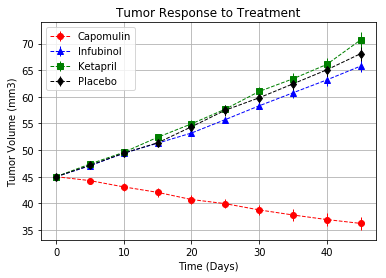

In [89]:
#Generate the Plot (with Error Bars)
#First I will generate the x axis. Creates a list from 0 to 50 with each step being 10 higher than the last
x_axis = np.arange(0, 50, 5)
# x_axis

Capomulin = plt.errorbar(x_axis,mean_tumor_pivot['Capomulin'],yerr = sem_tumor_pivot['Capomulin'],fmt="o",
                       color="red", linewidth=1, label="Capomulin",ls='--')

Infubinol = plt.errorbar(x_axis,mean_tumor_pivot['Infubinol'],yerr = sem_tumor_pivot['Infubinol'],fmt="^",
                       color="blue", linewidth=1, label="Infubinol",ls='--')

Ketapril = plt.errorbar(x_axis,mean_tumor_pivot['Ketapril'],yerr = sem_tumor_pivot['Ketapril'],fmt="s",
                       color="green", linewidth=1, label="Ketapril",ls='--')

Placebo = plt.errorbar(x_axis,mean_tumor_pivot['Placebo'],yerr = sem_tumor_pivot['Placebo'],fmt="d",
                       color="black", linewidth=1, label="Placebo",ls='--')

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

#Save the Figure
plt.savefig("Images/tumor_response_treatment.png")

In [60]:
#Show the Figure
plt.show()

## Metastatic Response to Treatment

In [61]:
#Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites = merge_table.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
#mean_metastatic_sites

#Convert to DataFrame
mean_metastatic_sites_df = pd.DataFrame(mean_metastatic_sites)

#Preview DataFrame
mean_metastatic_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [62]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_metastatic_volume = merge_table.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
#sem_metastatic_volume

# Convert to DataFrame
sem_metastatic_df = pd.DataFrame(sem_metastatic_volume)

# Preview DataFrame
sem_metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [63]:
#Resetting the Index of the Mean Data Frame. 
mean_metastatic_sites_df = mean_metastatic_sites_df.reset_index()
mean_metastatic_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [64]:
# Minor Data Munging to Re-Format the Data Frames
#Reformatting the mean data frame
mean_met_sites_pivot = mean_metastatic_sites_df.pivot(index = "Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
mean_met_sites_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [65]:
#Resetting the Index of the Standard Error Data Frame. 
sem_metastatic_df = sem_metastatic_df.reset_index()
sem_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [66]:
#Minor Data Munging to Re-Format the Data Frames
#Reformatting the Standard Error data frame
sem_metastatic_pivot = sem_metastatic_df .pivot(index = "Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
sem_metastatic_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


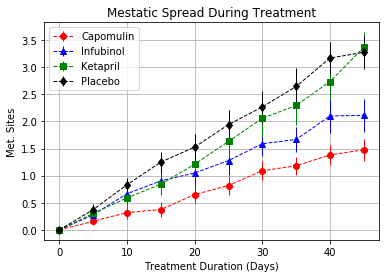

In [88]:
#Generate the Plot (with Error Bars)
#First I will generate the x axis. Creates a list from 0 to 50 with each step being 10 higher than the last
x_axis = np.arange(0, 50, 5)
# x_axis

Capomulin = plt.errorbar(x_axis,mean_metastatic_sites['Capomulin'],yerr = sem_metastatic_pivot['Capomulin'],fmt="o",
                       color="red", linewidth=1, label="Capomulin",ls='--')

Infubinol = plt.errorbar(x_axis,mean_metastatic_sites['Infubinol'],yerr = sem_metastatic_pivot['Infubinol'],fmt="^",
                       color="blue", linewidth=1, label="Infubinol",ls='--')

Ketapril = plt.errorbar(x_axis,mean_metastatic_sites['Ketapril'],yerr = sem_metastatic_pivot['Ketapril'],fmt="s",
                       color="green", linewidth=1, label="Ketapril",ls='--')

Placebo = plt.errorbar(x_axis,mean_metastatic_sites['Placebo'],yerr = sem_metastatic_pivot['Placebo'],fmt="d",
                       color="black", linewidth=1, label="Placebo",ls='--')

plt.legend(loc='best')
plt.title('Mestatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

#Save the Figure
plt.savefig("Images/mestatic_spread_treatment.png")

In [ ]:
plt.show()

## Survival Rates

In [68]:
#Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = merge_table.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
count_mice

#Convert to DataFrame
count_mice_df = pd.DataFrame(count_mice)

#Preview DataFrame
count_mice_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [69]:
#Resetting the Index
count_mice_df=count_mice_df.reset_index()
count_mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [70]:
#Minor Data Munging to Re-Format the Data Frames
count_mice_pivot = count_mice_df.pivot(index = "Timepoint",columns="Drug",values="Mouse ID")

# Preview that Reformatting worked
count_mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [91]:
# Generate the Plot (Accounting for percentages)
Cap_survival_percent = (count_mice_pivot['Capomulin']/count_mice_pivot['Capomulin'][0]) * 100
Cap_survival_percent

# Save the Figure

# Show the Figure
#plt.show()

Timepoint
0     100.0
5     100.0
10    100.0
15     96.0
20     92.0
25     88.0
30     88.0
35     88.0
40     84.0
45     84.0
Name: Capomulin, dtype: float64

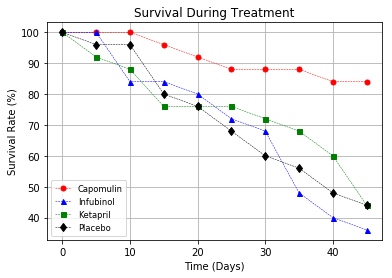

## Summary Bar Graph

In [47]:
# Calculate the percent changes for each drug
percent_change = (mean_tumor_pivot.loc[45, :] - mean_tumor_pivot.loc[0, :])/mean_tumor_pivot.loc[0, :] * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

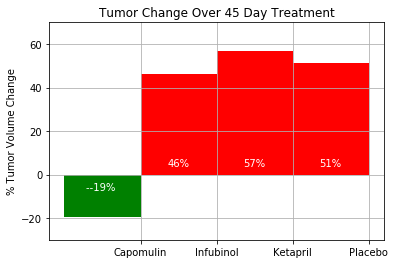